# Load and Cleaning Data

In [148]:

import pandas as pd
import polars as pl
import gzip
import pyarrow
import sys
import math
from pathlib import Path
from tqdm import tqdm
import os


import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add the `src` folder to Python's search path
src_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/src"
sys.path.append(src_path)
# load local src modules
# TODO to do create an import python file to load and create requirements

## Load Individual datasets 

### Load and quick clean / basic explore title.crew.tsv

In [2]:
from data import generate_dataset
from features import build_features
import json

# Load the JSON file
with open("/Users/bradkittrell/Projects/imdb/IMDB_Fun/src/data/api_keys.json", "r") as json_file:
    config = json.load(json_file)

omdb_key = config['OMDB_API_KEY']

In [4]:
clean_director_films = generate_dataset.clean_imdb_director_films(
    10)

clean_director_films.head()

INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Filtered names data to include only rows where birthYear > 1899
INFO:root:Dropped __index_level_0__ column
INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_crew.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_crew.parquet
INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_basics_movies.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_basics_movies.parquet
INFO:root:Dropped __index_level_0__ column
INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/ti

tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,directors,writers,num_films,primaryName,birthYear,deathYear,first_year,last_year,averageRating,numVotes
str,str,str,i64,i64,str,str,str,u32,str,i64,i64,i64,i64,f64,i64
"""tt0025557""","""El negro que tenía el alma bla…","""El negro que tenía el alma bla…",1951,87,"""Drama,Musical""","""nm0140459""","""nm0017046,nm0273236,nm0409404,…",13,"""Hugo del Carril""",1912,1989,1951,1975,6.8,43
"""tt0031603""","""Made in Germany - Die dramatis…","""Made in Germany""",1957,97,"""Biography,Drama""","""nm0772191""","""nm0530752,nm0726114""",24,"""Wolfgang Schleif""",1912,1984,1953,1974,6.8,22
"""tt0032787""","""Mi noche triste""","""Mi noche triste""",1952,92,"""Drama,Musical""","""nm0218119""","""nm1309659,nm0176570,nm0218119,…",21,"""Lucas Demare""",1910,1981,1951,1977,6.1,13
"""tt0035423""","""Kate & Leopold""","""Kate & Leopold""",2001,118,"""Comedy,Fantasy,Romance""","""nm0003506""","""nm0737216,nm0003506""",12,"""James Mangold""",1963,0,1995,2023,6.4,90056
"""tt0036247""","""Padre nuestro""","""Padre nuestro""",1953,89,"""Drama,Family""","""nm0350947""","""nm0017855,nm0124610,nm0350947""",52,"""Emilio Gómez Muriel""",1910,1985,1951,1972,6.7,12


In [4]:
# generate_dataset.load_ratings_imdb(None)

In [6]:
directors_yrly = build_features.normalized_yearly_directors(start_year=1950,
                                                            end_year=2024,

                                                            director_ids=list(set(clean_director_films['directors'].to_list())))

directors_yrly = directors_yrly.join(clean_director_films, left_on=["nconst", "year"],
                                     right_on=["directors", "startYear"], how="left")

directors_yrly

INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Filtered names data to include only rows where birthYear > 1899
INFO:root:Dropped __index_level_0__ column
INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Filtered names data to include only rows where birthYear > 1899
INFO:root:Dropped __index_level_0__ column
INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_crew.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_crew.parquet
INFO:root:No path provided. Using default path: /Users/bradkittr

director,nconst,deathYear,birthYear,year,num_films,primaryName,birthYear_right,deathYear_right,first_year,last_year,tconst,primaryTitle,originalTitle,runtimeMinutes,genres,writers,num_films_right,primaryName_right,birthYear_right,deathYear_right,first_year_right,last_year_right,averageRating,numVotes
str,str,i64,i64,i64,u32,str,i64,i64,i64,i64,str,str,str,i64,str,str,u32,str,i64,i64,i64,i64,f64,i64
"""Ingmar Bergman""","""nm0000005""",2007,1918,1951,31,"""Ingmar Bergman""",1918,2007,1951,2003,"""tt0044060""","""Summer Interlude""","""Sommarlek""",96,"""Drama,Romance""","""nm0000005,nm0340471""",31,"""Ingmar Bergman""",1918,2007,1951,2003,7.5,6771
"""Ingmar Bergman""","""nm0000005""",2007,1918,1952,31,"""Ingmar Bergman""",1918,2007,1951,2003,"""tt0044811""","""Secrets of Women""","""Kvinnors väntan""",107,"""Comedy,Drama""","""nm0000005,nm1749058""",31,"""Ingmar Bergman""",1918,2007,1951,2003,7.0,3028
"""Ingmar Bergman""","""nm0000005""",2007,1918,1953,31,"""Ingmar Bergman""",1918,2007,1951,2003,"""tt0045848""","""Sawdust and Tinsel""","""Gycklarnas afton""",93,"""Drama""","""nm0000005""",31,"""Ingmar Bergman""",1918,2007,1951,2003,7.4,7486
"""Ingmar Bergman""","""nm0000005""",2007,1918,1953,31,"""Ingmar Bergman""",1918,2007,1951,2003,"""tt0046345""","""Summer with Monika""","""Sommaren med Monika""",96,"""Drama,Romance""","""nm0283910,nm0000005""",31,"""Ingmar Bergman""",1918,2007,1951,2003,7.5,16451
"""Ingmar Bergman""","""nm0000005""",2007,1918,1954,31,"""Ingmar Bergman""",1918,2007,1951,2003,"""tt0047167""","""A Lesson in Love""","""En lektion i kärlek""",96,"""Comedy,Drama,Romance""","""nm0000005""",31,"""Ingmar Bergman""",1918,2007,1951,2003,7.0,3788
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Marco Romano""","""nm7702935""",0,1994,2020,14,"""Marco Romano""",1994,0,2017,2020,"""tt12282962""","""Ambient 0""","""Ambient 0""",81,"""Drama""","""nm7702935""",14,"""Marco Romano""",1994,0,2017,2020,8.5,23
"""Marco Romano""","""nm7702935""",0,1994,2020,14,"""Marco Romano""",1994,0,2017,2020,"""tt12283008""","""Gamlet""","""Gamlet""",100,"""Drama""","""nm7702935""",14,"""Marco Romano""",1994,0,2017,2020,8.3,23
"""Marco Romano""","""nm7702935""",0,1994,2020,14,"""Marco Romano""",1994,0,2017,2020,"""tt12283040""","""The Catcher in the Rye""","""The Catcher in the Rye""",105,"""Drama""","""nm7702935""",14,"""Marco Romano""",1994,0,2017,2020,8.3,27


In [14]:
directors_yrly = build_features.normalized_yearly_directors(start_year=1950,
                                                            end_year=2024,

                                                            director_ids=list(set(clean_director_films['directors'].to_list())))

directors_yrly = directors_yrly.join(clean_director_films, left_on=["nconst", "year"],
                                     right_on=["directors", "startYear"], how="left")
oscars = pd.read_csv(
    "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/external/oscars.csv", delimiter='\t', engine="python")


oscars_groupby_by_film = oscars[oscars['Ceremony'] > 23].groupby(["Film", "Year"]).agg({"Class": "count",
                                                                                        "Winner": "sum"}).reset_index()
oscars_groupby_by_film.rename(
    columns={"Class": "Nominations"}, inplace=True)
oscars_groupby_by_film['Winner'] = oscars_groupby_by_film['Winner'].fillna(
    0).astype(int)
# oscars_groupby_by_film.head()

oscars_groupby_by_film['Film_lower'] = oscars_groupby_by_film['Film'].str.lower(
).str.replace(" ", "").str.replace("'", "") + "_" + oscars_groupby_by_film['Year'].astype(str)

directors_yrly = directors_yrly.with_columns(
    pl.concat_str([pl.col("primaryTitle").str.to_lowercase().str.replace_all(" ", "").str.replace_all(r"'", "").str.replace_all(r"'", ""),
                   pl.col("year")],
                  separator="_").alias('Film_lower'))


directors_yrly = directors_yrly.join(
    pl.from_dataframe(oscars_groupby_by_film), left_on="Film_lower", right_on="Film_lower", how="left")

# directors_yrly = directors_yrly.filter((pl.col("year") >= pl.col(
#     "first_year")) & (pl.col("year") <= pl.col("last_year")))
# # print(directors_yrly.shape)
# directors_yrly.filter(
#     pl.col("primaryTitle").str.to_lowercase().str.contains("jurassic", literal=True))

# directors_yrly.filter(pl.col("nconst") == "nm0000229")

INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Filtered names data to include only rows where birthYear > 1899
INFO:root:Dropped __index_level_0__ column
INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Filtered names data to include only rows where birthYear > 1899
INFO:root:Dropped __index_level_0__ column
INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_crew.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_crew.parquet
INFO:root:No path provided. Using default path: /Users/bradkittr

In [110]:
directors_yrly_grouped = directors_yrly.group_by(["nconst", 'primaryName', "year"]).agg([pl.count("primaryTitle").alias(
    "film_count"), pl.sum("Winner").alias("oscar_wins"), pl.sum("Nominations").alias("oscar_noms"),  pl.mean("averageRating").alias("meanRating")]).sort("year")

directors_yrly_grouped = directors_yrly_grouped.to_pandas()

directors_yrly_grouped.fillna(0, inplace=True)
directors_yrly_grouped[directors_yrly_grouped['nconst'] == "nm0000229"]

,nconst,primaryName,year,film_count,oscar_wins,oscar_noms,meanRating
8400,nm0000229,Steven Spielberg,1964,1,0,0,5.50
9106,nm0000229,Steven Spielberg,1965,0,0,0,0.00
10541,nm0000229,Steven Spielberg,1966,0,0,0,0.00
11739,nm0000229,Steven Spielberg,1967,0,0,0,0.00
12382,nm0000229,Steven Spielberg,1968,0,0,0,0.00
13814,nm0000229,Steven Spielberg,1969,0,0,0,0.00
14842,nm0000229,Steven Spielberg,1970,0,0,0,0.00
15818,nm0000229,Steven Spielberg,1971,0,0,0,0.00
17014,nm0000229,Steven Spielberg,1972,0,0,0,0.00
18363,nm0000229,Steven Spielberg,1973,0,0,0,0.00


### Lets run a  long ELO

In [115]:
def update_elo_vectorized(df):
    """Vectorized function to update ELO scores for all directors."""

    # Initialize ELO ratings for all directors
    df['prev_elo'] = df.groupby('nconst')['elo'].shift(1).fillna(1500)

    # Compute global competitor mean ratings per year
    yearly_mean_ratings = df[df["film_count"] > 0].groupby('year')[
        'meanRating'].mean()
    df['competitor_mean_rating'] = df['year'].map(yearly_mean_ratings)

    # Compute rating difference against competition
    df['rating_above_mean'] = df['meanRating'] - df['competitor_mean_rating']

    # Identify last active year (last film appearance with nonzero count)
    # df['last_active'] = df.sort_values(['nconst', 'year']).groupby('nconst')[
    #     'year'].apply(lambda x: x.where(df['film_count'] > 0).ffill().fillna(x.min()))
    df['last_active'] = df[df['film_count'] > 0].groupby(
        'nconst')['year'].transform('max').fillna(df['year'])

    # Compute years of inactivity
    df['years_inactive'] = (df['year'] - df['last_active']).clip(lower=0)

    # Apply decay factor (2% per inactive year)
    df['decay_factor'] = np.power(0.98, df['years_inactive'])

    # Set K-factor dynamically
    df['k_factor'] = np.where(df['prev_elo'] > 2000, 2, 16)

    # Compute nomination and win bonuses
    df['nomination_bonus'] = df['oscar_noms'] * 2
    df['win_bonus'] = df['oscar_wins'] * 5
    df['mean_rating_diff_points'] = df['rating_above_mean'] * 1

    # Compute expected score adjustment
    yearly_avg_elo = df.groupby('year')['prev_elo'].mean()
    df['expected_score'] = 1 / \
        (1 + np.power(10,
         (yearly_avg_elo[df['year']].values - df['prev_elo']) / 200))

    # Calculate new ELO values
    df['new_elo'] = df['prev_elo'] + df['k_factor'] * (
        df['win_bonus'] + df['nomination_bonus'] +
        df['mean_rating_diff_points'] - df['expected_score'] * df['k_factor']
    )

    # Apply decay factor
    df['new_elo'] *= df['decay_factor']

    # Ensure ELO stays within limits
    df['elo'] = df['new_elo'].clip(lower=1000)

    return df


# Run ELO updates year by year
# years = sorted(directors_yrly_grouped['year'].unique())[1:]

directors_yrly_grouped['elo'] = 1500
directors_yrly_grouped.sort_values(['nconst', 'year']).groupby('nconst')[
    'year'].apply(lambda x: x.where(directors_yrly_grouped['film_count'] > 0).ffill().fillna(x.min())).tail(20)

# for year in tqdm(years, desc="Updating ELOs"):
# update_elo_vectorized(directors_yrly_grouped)

# directors_yrly_grouped[directors_yrly_grouped['nconst'] == "nm0637838"]

nconst          
nm6356309  71195    2017.0
           72287    2018.0
           73074    2019.0
           73797    2019.0
           73849    2021.0
           74793    2021.0
           75164    2023.0
nm6914507  70690    2016.0
           71455    2017.0
           71756    2018.0
           73003    2019.0
           73537    2020.0
           73998    2021.0
           74784    2022.0
           75377    2023.0
           75419    2024.0
nm7702935  71189    2017.0
           71896    2018.0
           72770    2019.0
           73612    2020.0
Name: year, dtype: float64

In [82]:
directors_yrly_grouped.groupby('nconst')['elo'].shift(1).fillna(1500)

0        1500.000000
1        1500.000000
2        1500.000000
3        1500.000000
4        1500.000000
            ...     
75581    1269.132154
75582    1352.732154
75583    1500.000000
75584    1500.000000
75585    1500.000000
Name: elo, Length: 75586, dtype: float64

In [185]:
from hmac import new
from tokenize import Octnumber
import numpy as np


def update_elo_with_decay(person_id, nominations, wins, current_elo, competitors, last_active_year, current_year, mean_rating_diff):
    if current_elo > 2000:
        k_factor = 2
    else:
        k_factor = 16  # Adjust impact size of changes

    # Adjust for nominations (small boost)
    nomination_bonus = 1 * nominations

    # Adjust for wins (bigger boost)
    win_bonus = 5 * wins

    mean_rating_diff_points = 0.5 * mean_rating_diff

    # Adjust based on competition strength (ELO difference matters)
    avg_competitor_elo = np.mean(
        [competitors.get(cid, 1500) for cid in competitors if cid != person_id])
    # print(avg_competitor_elo)
    expected_score = 1 / \
        (1 + (10 ** ((avg_competitor_elo - current_elo) / 200)))

    # Time decay: Penalize inactivity over years
    years_inactive = max(0, current_year - last_active_year)
    decay_factor = 0.98 ** years_inactive  # 2% decay per inactive year

    # Final ELO adjustment
    new_elo = current_elo + k_factor * \
        (win_bonus + nomination_bonus +
         mean_rating_diff_points - expected_score * k_factor)

    # Apply decay factor
    new_elo *= decay_factor

    return np.max([round(new_elo, 2), 1000])  # limit ELO at 3000


directors_yrly_grouped['elo'] = 1500

years = sorted(directors_yrly_grouped['year'].unique())[1:]
# simulate ELO adjustments over an award season

# precompute
competitor_mean_rating_yr = directors_yrly_grouped[directors_yrly_grouped["film_count"] > 0].groupby("year")[
    "meanRating"].mean()


for year in tqdm(years, desc="Updating ELOs"):
    # add smooth computation
    # directors_yrly_grouped['elo'] = directors_yrly_grouped.groupby("nconst")['elo'].transform(
    #     lambda x: x.rolling(window=3, min_periods=1).mean())
    year_ = directors_yrly_grouped[directors_yrly_grouped['year'] == year]
#     # competitor_elos
    previous_year = directors_yrly_grouped[directors_yrly_grouped['year'] == year - 1]
    competitor_elos = {
        row.nconst: row.elo for row in year_.itertuples()}
    competitor_mean_rating = competitor_mean_rating_yr[year]

    for row in year_.itertuples():
        # loop through each director in the current year
        person_id = row.nconst
        nominations = row.oscar_noms
        wins = row.oscar_wins

        if row.film_count == 0:
            mean_score = directors_yrly_grouped[(directors_yrly_grouped['nconst'] == person_id) & (
                directors_yrly_grouped['year'] <= year) & (directors_yrly_grouped['film_count'] > 0)]["meanRating"].mean()
            rating_above_mean = mean_score - competitor_mean_rating
        if row.film_count == 0 and math.isnan(directors_yrly_grouped[(directors_yrly_grouped['nconst'] == person_id) & (
                directors_yrly_grouped['year'] <= year) & (directors_yrly_grouped['film_count'] > 0)]["meanRating"].mean()):
            rating_above_mean = 0
        if row.film_count > 0:
            rating_above_mean = row.meanRating - competitor_mean_rating
        if len(directors_yrly_grouped[(directors_yrly_grouped['nconst'] == person_id) & (
                directors_yrly_grouped['year'] < year)]) == 0:
            current_elo = 1500
        else:
            current_elo = directors_yrly_grouped[(directors_yrly_grouped['nconst'] == person_id) & (
                directors_yrly_grouped['year'] < year)].iloc[-1]['elo']
        last_active = directors_yrly_grouped[(directors_yrly_grouped['nconst'] == person_id) & (
            directors_yrly_grouped['year'] <= year) & (directors_yrly_grouped['film_count'] > 0)]['year'].max()

    # Update ELO
        new_elo = update_elo_with_decay(person_id, nominations, wins,
                                        current_elo, competitor_elos, last_active, year, mean_rating_diff=rating_above_mean)
        directors_yrly_grouped.at[row.Index, 'elo'] = new_elo

Updating ELOs:   0%|          | 0/73 [00:00<?, ?it/s]/var/folders/2y/ff9nvh415f39qp7gpf59jk440000gn/T/ipykernel_92527/1799410789.py:90: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1369.26' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  directors_yrly_grouped.at[row.Index, 'elo'] = new_elo
Updating ELOs: 100%|██████████| 73/73 [08:44<00:00,  7.18s/it]


In [184]:
# directors_yrly_grouped.groupby("nconst")['elo'].transform(
#     lambda x: x.rolling(window=3, min_periods=1).mean()).describe()

# directors_yrly_grouped.groupby("nconst")['elo'].transform(
#     lambda x: x.rolling(window=3, min_periods=1).mean()).describe()

directors_yrly_grouped

,nconst,primaryName,year,film_count,oscar_wins,oscar_noms,meanRating,elo
0,nm0617655,Fernando Méndez,1951,3,0,0,6.300000,1500.0
1,nm0078016,André Berthomieu,1951,3,0,0,5.366667,1500.0
2,nm0494110,Reginald Le Borg,1951,1,0,0,6.300000,1500.0
3,nm0703689,Richard Quine,1951,2,0,0,6.350000,1500.0
4,nm0350947,Emilio Gómez Muriel,1951,3,0,0,5.566667,1500.0
...,...,...,...,...,...,...,...,...
75581,nm0349484,Chus Gutiérrez,2024,1,0,0,4.000000,1000.0
75582,nm2790548,Yû Irie,2024,1,0,0,8.000000,1000.0
75583,nm0405632,Mikael Håfström,2024,1,0,0,6.300000,1000.0
75584,nm0000338,Francis Ford Coppola,2024,1,0,0,6.500000,1000.0


In [156]:
directors_yrly_grouped[directors_yrly_grouped['year'] == 1952]


directors_yrly_grouped[directors_yrly_grouped['nconst'] == 'nm0555476']

person_id = "nm0555476"
nominations = 0
wins = 0

test = directors_yrly_grouped[directors_yrly_grouped['nconst'] == person_id]


if row.film_count == 0:
    mean_score = directors_yrly_grouped[(directors_yrly_grouped['nconst'] == person_id) & (
        directors_yrly_grouped['year'] <= year) & (directors_yrly_grouped['film_count'] > 0)]["meanRating"].mean()
    rating_above_mean = mean_score - competitor_mean_rating
if row.film_count == 0 and math.isnan(directors_yrly_grouped[(directors_yrly_grouped['nconst'] == person_id) & (
        directors_yrly_grouped['year'] <= year) & (directors_yrly_grouped['film_count'] > 0)]["meanRating"].mean()):

    rating_above_mean = 0
if row.film_count > 0:
    rating_above_mean = row.meanRating - competitor_mean_rating
if len(directors_yrly_grouped[(directors_yrly_grouped['nconst'] == person_id) & (
        directors_yrly_grouped['year'] < year)]) == 0:
    current_elo = 1500

rating_above_mean

0

#### Old

In [200]:
directors_yrly_grouped.groupby(["nconst", "primaryName"]).agg(
    {"elo": "mean"}).sort_values("elo", ascending=False).head(50)

,,elo
nconst,primaryName,
nm0003593,Fred Zinnemann,1733.591563
nm0001392,Peter Jackson,1675.696071
nm0001415,Elia Kazan,1626.844615
nm0000229,Steven Spielberg,1568.987119
nm0634240,Christopher Nolan,1390.563462
nm0769874,Franklin J. Schaffner,1383.019259
nm0001351,George Roy Hill,1375.172593
nm0000797,Hal Ashby,1361.434118
nm7702935,Marco Romano,1344.285000


In [186]:
directors_yrly_grouped.groupby(["nconst", "primaryName"]).agg(
    {"elo": "max"}).sort_values("elo", ascending=False).head(50)

,,elo
nconst,primaryName,
nm0001392,Peter Jackson,2519.96
nm0003593,Fred Zinnemann,2436.49
nm0000229,Steven Spielberg,2370.30
nm0943758,William Wyler,2339.97
nm0001415,Elia Kazan,2200.75
nm0769874,Franklin J. Schaffner,2048.22
nm0001232,Milos Forman,2045.30
nm0000338,Francis Ford Coppola,2045.25
nm0634240,Christopher Nolan,2038.04


<Axes: xlabel='year', ylabel='elo'>

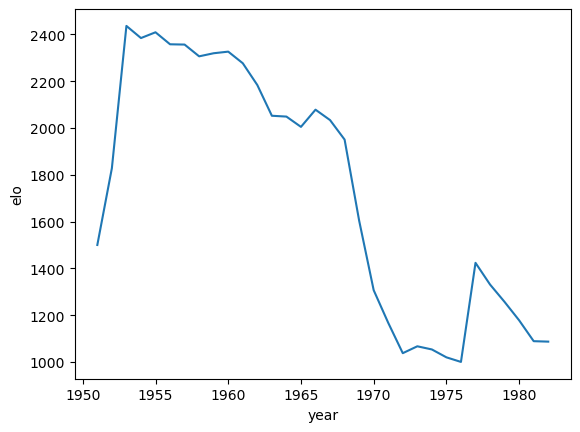

In [201]:

sns.lineplot(
    data=directors_yrly_grouped[directors_yrly_grouped['nconst'] == 'nm0003593'], x="year", y="elo")

In [194]:
directors_yrly_grouped

,nconst,primaryName,year,film_count,oscar_wins,oscar_noms,meanRating,elo
0,nm0617655,Fernando Méndez,1951,3,0,0,6.300000,1500.00
1,nm0078016,André Berthomieu,1951,3,0,0,5.366667,1500.00
2,nm0494110,Reginald Le Borg,1951,1,0,0,6.300000,1500.00
3,nm0703689,Richard Quine,1951,2,0,0,6.350000,1500.00
4,nm0350947,Emilio Gómez Muriel,1951,3,0,0,5.566667,1500.00
...,...,...,...,...,...,...,...,...
75581,nm0349484,Chus Gutiérrez,2024,1,0,0,4.000000,1000.00
75582,nm2790548,Yû Irie,2024,1,0,0,8.000000,1066.19
75583,nm0405632,Mikael Håfström,2024,1,0,0,6.300000,1000.78
75584,nm0000338,Francis Ford Coppola,2024,1,0,0,6.500000,1002.38


In [24]:
principals.to_parquet(
    "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_principals.parquet")

In [9]:
# with open(file_path, 'r') as file:
#     for line_num, line in enumerate(file):
#         if '"' in line and line.count('"') % 2 != 0:
#             print(f"Problem in line {line_num + 1}: {line}")

with open(new_path, 'r') as infile, open(newer_path, 'w') as outfile:
    for line in infile:
        # Skip lines with mismatched quotes
        if '"' in line and line.count('"') % 2 != 0:
            continue  # Do not write this line to the output file

        # Skip lines containing the specific phrase
        if '"Picturized By", i.e., screenplay' in line:
            continue  # Do not write this line to the output file
        if 'When Knighthood Was in Flower' in line:
            continue
        # Write all other lines to the output file
        outfile.write(line)

In [4]:
new_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title.principals.tsv"
with open(file_path, 'r') as infile, open(new_path, 'w') as outfile:
    for line in infile:
        # Fix mismatched quotes
        if '"' in line and line.count('"') % 2 != 0:
            line = line.replace('"', '')  # Or implement a better custom fix
        outfile.write(line)

#### New

In [27]:
principals.head()

tconst,ordering,nconst,category,job,characters
str,i64,str,str,str,str
"""tt0000001""",1,"""nm1588970""","""self""","""\N""","""[""Self""]"""
"""tt0000001""",2,"""nm0005690""","""director""","""\N""","""\N"""
"""tt0000001""",3,"""nm0005690""","""producer""","""producer""","""\N"""
"""tt0000001""",4,"""nm0374658""","""cinematographer""","""director of photography""","""\N"""
"""tt0000002""",1,"""nm0721526""","""director""","""\N""","""\N"""


In [6]:
# with open(file_path, 'r') as infile, open(new_path, 'w') as outfile:
#     for line in infile:
#         # Fix mismatched quotes
#         # if '"' in line and line.count('"') % 2 != 0:
#             line = line.replace('"', '')  # Or implement a better custom fix
#         outfile.write(line)
import os

# Get the absolute path to `src`
src_path = os.path.abspath("src/data")
print("Absolute Path to `src`:", src_path)

# print("Directory contents:", os.listdir(src_path))

os.listdir()

Absolute Path to `src`: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Notebooks/src/data


['1_0_load_data.ipynb']

In [101]:
file_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/raw/name.basics.tsv"
# cleaned_file_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/raw/name.tsv"
new_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/raw/name.tsv"
# load with pandas and clean out all \N values for birth year but keep death year
# with gzip.open(file_path, 'rt', encoding='utf-8') as gz_file:
names = pd.read_csv(new_path, sep='\t')
names = names[names['birthYear'] != '\\N']

names['deathYear'] = names['deathYear'].replace(r'\\N', '0', regex=True).astype(
    int)
names['birthYear'] = names['birthYear'].astype(int,)

In [ ]:
# lets analyze this names file a bit

names = pl.read_parquet(
    "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet")

print(names.shape)
# how ever names gets loaded should have a filter at beggining dropping this
names = names.filter(pl.col("birthYear") > 1899)

(625269, 7)


<Axes: xlabel='birthYear', ylabel='count'>

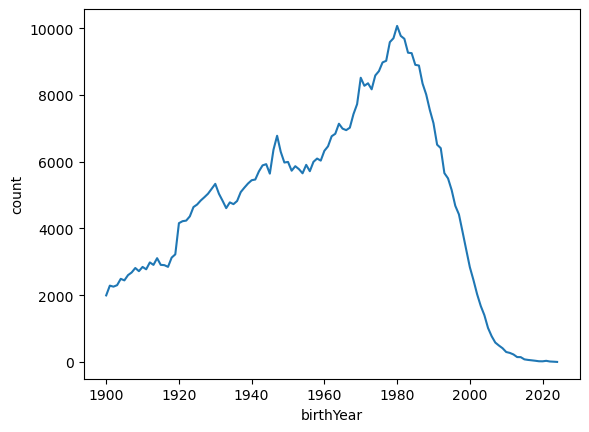

In [10]:
# groupby birth year and count
import matplotlib.pyplot as plt
import seaborn as sns
birth_yr_cnt = names.group_by('birthYear').agg(pl.count('birthYear').alias(
    'count')).sort('birthYear')


sns.lineplot(data=birth_yr_cnt.to_pandas(), x='birthYear', y='count')

In [8]:
names = names.filter(pl.col("primaryName").str.contains("Brad"))
names

nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,__index_level_0__
str,str,i64,i64,str,str,i64
"""nm0000093""","""Brad Pitt""",1963,0,"""producer,actor,executive""","""tt0137523,tt0356910,tt0114746,…",92


## Ratings Analysis

In [5]:
ratings_raw_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/raw/title.ratings.tsv.gz"
with gzip.open(ratings_raw_path, 'rt', encoding='utf-8') as gz_file:
    ratings = pl.read_csv(gz_file, separator="\t")

In [10]:
ratings.describe()

statistic,tconst,averageRating,numVotes
str,str,f64,f64
"""count""","""1476218""",1.476218e6,1.476218e6
"""null_count""","""0""",0.0,0.0
"""mean""",null,6.961667,1031.263322
"""std""",null,1.378719,17751.222088
"""min""","""tt0000001""",1.0,5.0
"""25%""",null,6.2,11.0
"""50%""",null,7.2,26.0
"""75%""",null,7.9,101.0
"""max""","""tt9916880""",10.0,2.939682e6


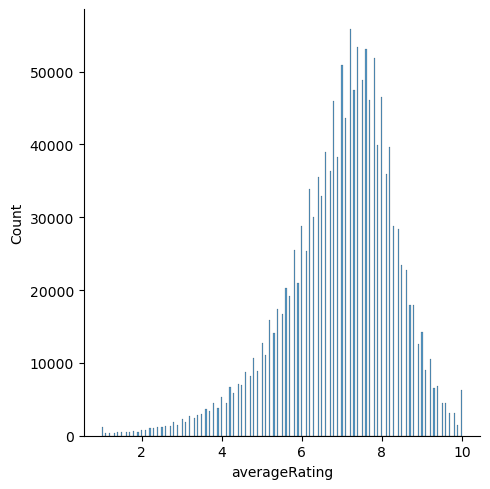

In [ ]:
from statistics import kde


sns.displot(data=ratings, x='averageRating',)

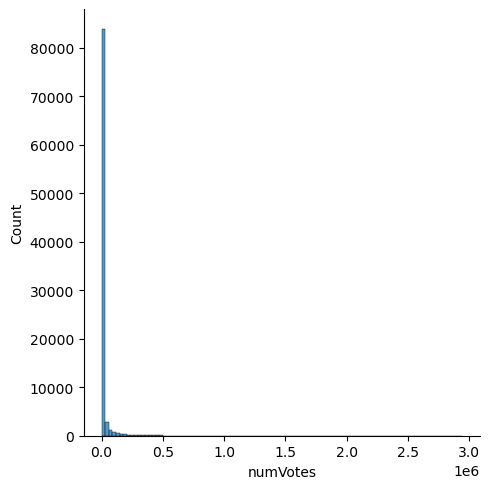

In [22]:
sns.displot(data=ratings.filter(
    pl.col('numVotes') > 1000), x='numVotes', bins=100)

In [31]:
# relationship between num votes and rating?

ratings.write_parquet(
    "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_ratings.parquet")

In [66]:
with open(title_basics_processed_path, 'r') as file:
    for line_num, line in enumerate(file):
        if '"' in line and line.count('"') % 2 != 0:
            print(f"Problem in line {line_num + 1}: {line}")

# with open(title_basics_processed_path, 'r') as file:
#     for line_num, line in enumerate(file):
#         if '"Rome brûle"' in line:
#             print(f"Problem in line {line_num + 1}: {line}")


# Open the input file for reading and the output file for writing
with open(title_basics_raw_path, 'r') as infile, open(title_basics_processed_path, 'w') as outfile:
    for line in infile:
        # Skip lines with mismatched quotes
        if '"' in line and line.count('"') % 2 != 0:
            continue  # Do not write this line to the output file

        # Skip lines containing the specific phrase
        if '"Rome brûle" (Portrait de Shirley Clarke)' in line:
            continue  # Do not write this line to the output file
        if 'The New Mrs Saunders' in line:
            continue
        if 'Gates Ajar' in line:
            continue
        # Write all other lines to the output file
        outfile.write(line)

In [59]:


def clean_bad_tsv(path: str, output_dir):
    """_summary_

    Args:
        path (str): _description_
    """

    with open(path, 'r') as infile, open(output_dir, 'w') as outfile:
        for line in infile:
            # Fix mismatched quotes
            if '"' in line and line.count('"') % 2 != 0:
                # Or implement a better custom fix
                line = line.replace('"', '')
            outfile.write(line)

    return


title_basics_processed_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title.basics.tsv"
clean_bad_tsv(title_basics_raw_path, output_dir=title_basics_processed_path)

In [97]:
title_basics_processed_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_basics_movies.parquet"

title_basics = pl.read_parquet(title_basics_processed_path,
                               )

In [99]:
title_basics.describe()

statistic,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,__index_level_0__
str,str,str,str,str,f64,f64,f64,f64,str,f64
"""count""","""518825""","""518825""","""518823""","""518823""",518825.0,518825.0,518825.0,518825.0,"""518825""",518825.0
"""null_count""","""0""","""0""","""2""","""2""",0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",null,null,null,null,0.017584,2001.710004,0.0,68.480403,null,4.2714e6
"""std""",null,null,null,null,0.131434,19.892149,0.0,142.539455,null,3.6399e6
"""min""","""tt0011801""","""movie""","""!Women Art Revolution""","""#""",0.0,1951.0,0.0,0.0,"""Action""",11632.0
"""25%""",null,null,null,null,0.0,1988.0,0.0,45.0,null,338863.0
"""50%""",null,null,null,null,0.0,2009.0,0.0,81.0,null,3.917664e6
"""75%""",null,null,null,null,0.0,2017.0,0.0,96.0,null,7.660926e6
"""max""","""tt9916754""","""movie""","""Пожиратель""","""împetu""",1.0,2031.0,0.0,59460.0,"""\N""",1.1076541e7


In [74]:
title_basics['endYear'] = title_basics['endYear'].replace(r'\\N', '0', regex=True).astype(
    int)

title_basics['startYear'] = title_basics['startYear'].replace(r'\\N', '0', regex=True).astype(
    int)

title_basics.describe()

,startYear,endYear
count,1.107659e+07,1.107659e+07
mean,1.749636e+03,2.347635e+01
std,6.698880e+02,2.158049e+02
min,0.000000e+00,0.000000e+00
25%,1.987000e+03,0.000000e+00
50%,2.011000e+03,0.000000e+00
75%,2.018000e+03,0.000000e+00
max,2.031000e+03,2.030000e+03


In [95]:
# drop anything before 1950
print(f"length overall {title_basics.shape[0]}")

print(
    f"length after 1950: {title_basics[title_basics['startYear']>1950].shape[0]}")

title_basics_cleaned = title_basics[(title_basics['startYear'] > 1950) & (
    title_basics['titleType'] == 'movie')]

title_basics_cleaned['isAdult'] = title_basics_cleaned['isAdult'].astype(int)
title_basics_cleaned['startYear'] = title_basics_cleaned['startYear'].astype(
    int)
title_basics_cleaned['endYear'] = title_basics_cleaned['endYear'].astype(int)
title_basics_cleaned['runtimeMinutes'] = title_basics_cleaned['runtimeMinutes'].replace(r'\\N', '0', regex=True).astype(
    int)


title_basics_cleaned.to_parquet(
    "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_basics_movies.parquet")

# title_basics_cleaned.isAdult.value_counts()

length overall 11076591
length after 1950: 9450442


/var/folders/2y/ff9nvh415f39qp7gpf59jk440000gn/T/ipykernel_1862/1674133035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_basics_cleaned['isAdult'] = title_basics_cleaned['isAdult'].astype(int)
/var/folders/2y/ff9nvh415f39qp7gpf59jk440000gn/T/ipykernel_1862/1674133035.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_basics_cleaned['startYear'] = title_basics_cleaned['startYear'].astype(
/var/folders/2y/ff9nvh415f39qp7gpf59jk440000gn/T/ipykernel_1862/1674133035.py:13: SettingWithCopyWar